# Axial vibration of 1D bar using LearnMPM


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/geoelements/learn-mpm/blob/main/book/learnmpm-axial-vibration1d.ipynb)
[![Try on DesignSafe](https://img.shields.io/badge/Open%20in-DesignSafe-blue.svg?logo=)](https://jupyter.designsafe-ci.org/user/name/notebooks/CommunityData/Use%20Case%20Products/MPM/LearnMPM/learnmpm-axial-vibration1d.ipynb)


Implementation of axial 1D bar using `LearnMPM` module.

In [1]:
# include the learnmpm path to the current path
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np

from analytical import axial_vibration_bar1d as avb

from LearnMPM import mesh
from LearnMPM import material
from LearnMPM import params as prms
from LearnMPM import solver

# bar length
Length = 25

# number of elements
nelements = 15

# create an 1D mesh
msh = mesh.Mesh1D(domain_size=Length, nelements=nelements)

# define a linear material 
elastic = material.LinearElastic1D(E=100, density=1)

# generate particles in mesh elements and set the material
msh.generate_particles_uniform(ppc = 2, material = elastic)
# msh.generate_particles_gauss(ppc = 2,material = elastic)

# setup the model
params = prms.Params()
params.mpm_scheme = 'USF'
params.nsteps = 600
params.dt = 0.1
params.results_particle = -1
params.results_fields = ['velocity', 'position']
params.damping = 0.0

# verify time step
dt_critical=msh.elements[0].size/np.sqrt(elastic.E/elastic.density)
params.dt = params.dt if (params.dt < dt_critical) else dt_critical

# impose initial condition in particles
vo = 0.1
b1 = np.pi/2.0/Length
for prtcl in msh.particles:
  prtcl.velocity = vo * np.sin(b1 * prtcl.x)

# Apply boundary conditions
msh.boundary_nodes = [0]

# solve the problem in time
solver.explicit_solution(msh, params)

> Plot velocity results of the last particle

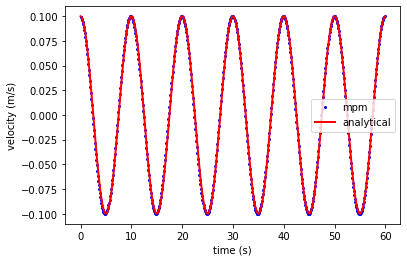

In [2]:
# get analytical solution
[anal_xt,anal_vt, anal_t] = avb.axial_vibration_bar1d(Length, elastic.E, elastic.density, 
                              params.dt * params.nsteps, params.dt, vo, msh.particles[params.results_particle].x)
    
# plot mpm solution
plt.plot(params.results['time'], params.results['velocity'], 'ob', markersize = 2, label='mpm')

# plot the analytical solution
plt.plot(anal_t,anal_vt,'r',linewidth=2,label='analytical')

# configure axis, legends and show plot
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.legend()
plt.show()